In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import matplotlib.pyplot as plt

In [15]:
# Leer datos
df = pd.read_csv('data_boston.csv', header='infer', encoding='latin1')
df = df[['PRICE']]

# Escalar datos
scaler = MinMaxScaler()
ts_scaled = scaler.fit_transform(df)

In [16]:
# Crear secuencias de datos
def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])
        labels.append(data[i + seq_length])
    return np.array(sequences), np.array(labels)

In [17]:
seq_length = 10  # Número de pasos de tiempo
X, y = create_sequences(ts_scaled, seq_length)

In [18]:
# Dividir datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

In [19]:
# Parámetros de entrenamiento
batch_size = 1
n_epochs = 1000
learn_rate = 0.0001

In [20]:
# Definir el modelo
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(50, activation='relu', return_sequences=True, input_shape=(seq_length, 1)),
    tf.keras.layers.SimpleRNN(50, activation='relu'),
    tf.keras.layers.Dense(1)
])
model

c:\Users\crist\Documents\Samsung-Innovation-Campus\env\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


<Sequential name=sequential_1, built=True>

In [21]:
# Compilar el modelo
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learn_rate), loss='mean_squared_error', metrics=['accuracy'])

In [22]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=1)

Epoch 1/1000
396/396 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.0055 - loss: 0.1979 - val_accuracy: 0.0000e+00 - val_loss: 0.0112
Epoch 2/1000
396/396 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0248 - loss: 0.0252 - val_accuracy: 0.0000e+00 - val_loss: 0.0114
Epoch 3/1000
396/396 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.0534 - loss: 0.0274 - val_accuracy: 0.0000e+00 - val_loss: 0.0119
Epoch 4/1000
396/396 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.0330 - loss: 0.0229 - val_accuracy: 0.0000e+00 - val_loss: 0.0090
Epoch 5/1000
396/396 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.0524 - loss: 0.0266 - val_accuracy: 0.0000e+00 - val_loss: 0.0093
Epoch 6/1000
396/396 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0459 - loss: 0.0193 - val_accuracy: 0.0000e+00 - val_loss: 0.0092
Epoch 7/1000
396/396 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.0476 - loss: 0.0236 - val_accuracy: 0.0000e+00 - val_loss: 0.0094
Epoch 8/1000
396/396 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accura

In [23]:
# Evaluar el modelo
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=batch_size)
print('Precisión en el conjunto de prueba:', test_accuracy)


100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0227
Precisión en el conjunto de prueba: 0.0


In [24]:
# Predicciones
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step


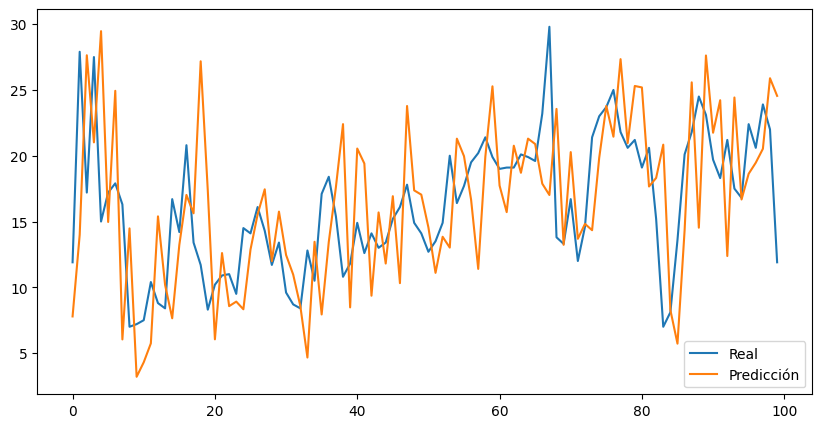

In [25]:
# Graficar resultados
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Real')
plt.plot(y_pred, label='Predicción')
plt.legend()
plt.show()

In [26]:
model.save('model_rnn_AscencioCruzCristopherEduardo.h5')
model.save('model_rnn_AscencioCruzCristopherEduardo.keras')